In [57]:
import pandas as pd

In [58]:
injections_per_fm = 250

In [59]:
df = pd.read_csv("./results_stdout.csv")
df.columns = ["Group", "Type", *df.columns[2:]]
df

,Group,Type,Output error,Classification error,Other error
0,gp,FLIP_SINGLE_BIT,11.6,0.4,2.4
1,gp,RANDOM_VALUE,34.8,2.4,9.6
2,ld,FLIP_SINGLE_BIT,5.2,0.0,0.0
3,ld,RANDOM_VALUE,38.0,1.6,0.0
4,fp32,FLIP_SINGLE_BIT,10.0,0.8,0.0
5,fp32,RANDOM_VALUE,40.8,3.6,0.0
6,fp32,WARP_RANDOM_VALUE,75.2,2.0,0.0


<Axes: title={'center': 'LDs error measurements'}, xlabel='Type', ylabel='error rate %'>

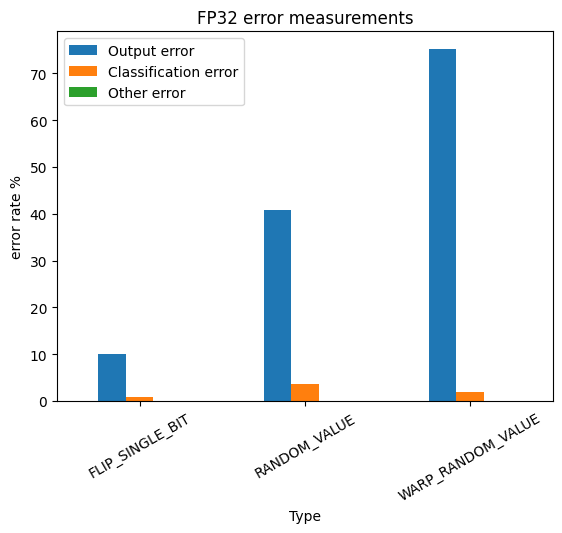

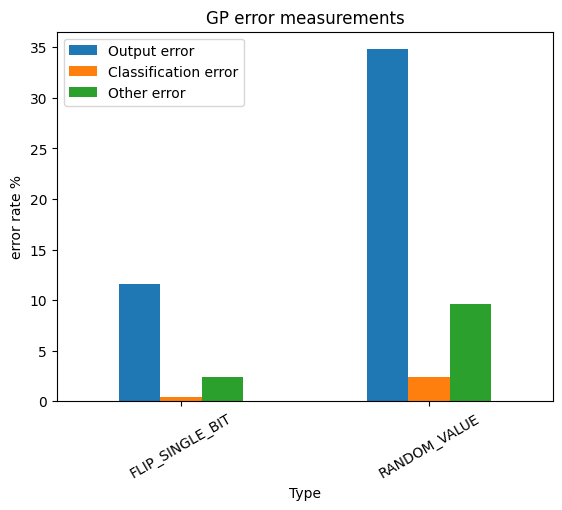

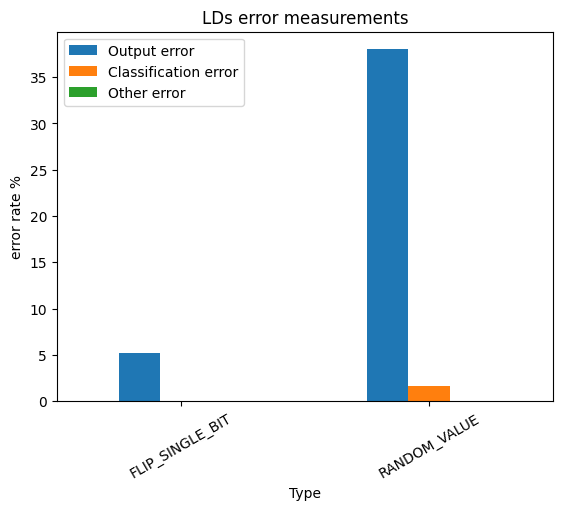

In [60]:
df_fp32 = df[df["Group"] == "fp32"]
df_gp = df[df["Group"] == "gp"]
df_ld = df[df["Group"] == "ld"]

df_fp32.index = df_fp32["Type"]
df_gp.index = df_gp["Type"]
df_ld.index = df_ld["Type"]

df_fp32.plot(kind="bar", ylabel="error rate %", title="FP32 error measurements", rot=30)
df_gp.plot(kind="bar", ylabel="error rate %", title="GP error measurements", rot=30)
df_ld.plot(kind="bar", ylabel="error rate %", title="LDs error measurements", rot=30)

In [61]:
df_kernels = pd.read_csv("./results_kernel.csv")
df_kernels.columns = ["Kernel", *df_kernels.columns[1:]]
df_kernels

,Kernel,Output error,Classification error,Masked,Other error
0,volta_sgemm_128x32_tn,284,27,634,45
1,volta_sgemm_64x32_sliced1x4_tn,213,0,444,24
2,"voidimplicit_convolve_sgemm<float,float,1024,5...",8,0,7,0
3,voidattention_kernel_batched<AttentionKernel<f...,28,0,57,2
4,voidat::native::vectorized_elementwise_kernel<...,3,0,10,0
5,voidat::native::vectorized_elementwise_kernel<...,0,0,2,1
6,voidat::native::(anonymousnamespace)::vectoriz...,3,0,4,0
7,"voidat::native::elementwise_kernel<128,2,at::n...",0,0,0,2
8,voidat::native::vectorized_elementwise_kernel<...,0,0,0,2


<Axes: xlabel='Kernel'>

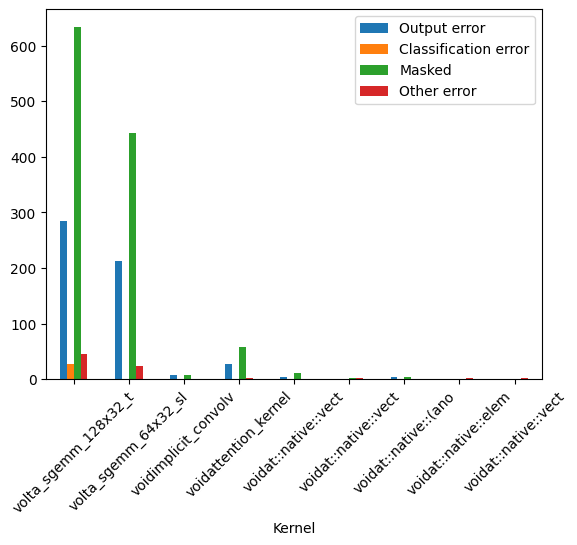

In [62]:
df_kernels.index = pd.Series([k[:20] for k in df_kernels["Kernel"]], name="Kernel")
df_kernels.plot(kind="bar", rot=45,)

In [63]:
df_cat = pd.read_csv("./results_cat.csv")
df_cat.columns = ["Group", "Type", *df_cat.columns[2:]]
df_cat

,Group,Type,SDC,Critical SDC,DUE
0,gp,FLIP_SINGLE_BIT,11.2,0.4,2.4
1,gp,RANDOM_VALUE,32.4,2.4,9.6
2,ld,FLIP_SINGLE_BIT,5.2,0.0,0.0
3,ld,RANDOM_VALUE,36.4,1.6,0.0
4,fp32,FLIP_SINGLE_BIT,9.2,0.8,0.0
5,fp32,RANDOM_VALUE,37.2,3.6,0.0
6,fp32,WARP_RANDOM_VALUE,73.2,2.0,0.0


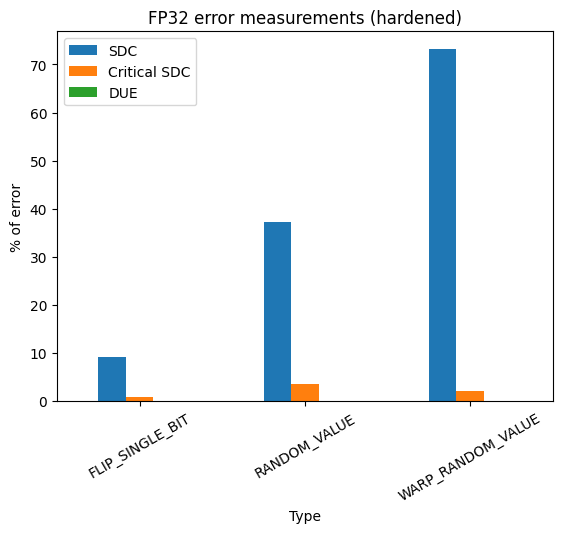

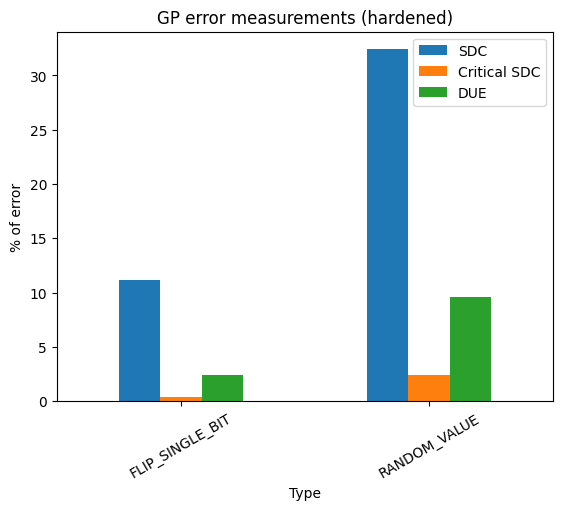

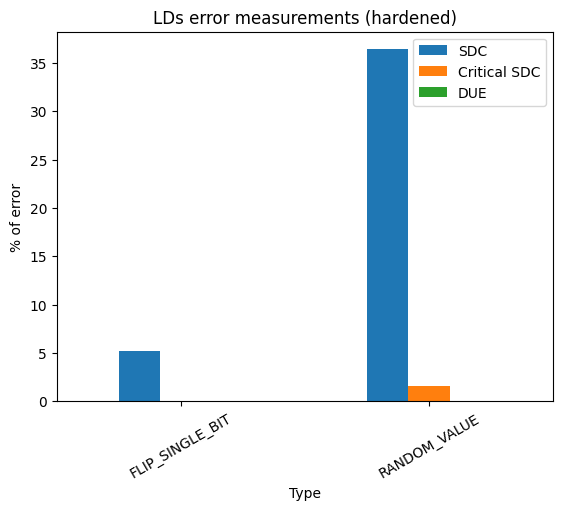

In [76]:
df_fp32 = df_cat[df_cat["Group"] == "fp32"]
df_gp = df_cat[df_cat["Group"] == "gp"]
df_ld = df_cat[df_cat["Group"] == "ld"]

df_fp32.index = df_fp32["Type"]
df_gp.index = df_gp["Type"]
df_ld.index = df_ld["Type"]

fp32_plt = df_fp32.plot(kind="bar", ylabel=f"% of error", title="FP32 error measurements (hardened)", rot=30)
gp_plt = df_gp.plot(kind="bar", ylabel=f"% of error", title="GP error measurements (hardened)", rot=30)
ld_plt = df_ld.plot(kind="bar", ylabel=f"% of error", title="LDs error measurements (hardened)", rot=30)

# fp32_plt.set_ylim(0,100)
# gp_plt.set_ylim(0,100)
# ld_plt.set_ylim(0,100)

# fp32_plt.set_yticks([x for x in range(0, 101, 10)])
# gp_plt.set_yticks([x for x in range(0, 101, 10)])
# ld_plt.set_yticks([x for x in range(0, 101, 10)])